<a href="https://colab.research.google.com/github/NadiaSbaa/IntroToDeepLearning/blob/master/IntroductionDeppLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Dependencies
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv('data.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
#changing pandas datframe to numpy array
#X represents the features
X = dataset.iloc[:,:7].values
#Y represents the label
y = dataset.iloc[:,8:].values


In [0]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [0]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
 #Neural network
model = Sequential([
     Dense(16, input_dim =7 , activation='relu'),
     Dense(12, activation='relu'),
     Dense(2, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 26        
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size=64)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 166us/step - loss: 0.6407 - accuracy: 0.7101 - val_loss: 0.6324 - val_accuracy: 0.7013
Epoch 2/100
614/614 [==============================] - 0s 33us/step - loss: 0.6199 - accuracy: 0.7427 - val_loss: 0.6157 - val_accuracy: 0.7338
Epoch 3/100
614/614 [==============================] - 0s 32us/step - loss: 0.6001 - accuracy: 0.7508 - val_loss: 0.5995 - val_accuracy: 0.7273
Epoch 4/100
614/614 [==============================] - 0s 32us/step - loss: 0.5831 - accuracy: 0.7508 - val_loss: 0.5837 - val_accuracy: 0.7403
Epoch 5/100
614/614 [==============================] - 0s 35us/step - loss: 0.5664 - accuracy: 0.7557 - val_loss: 0.5704 - val_accuracy: 0.7468
Epoch 6/100
614/614 [==============================] - 0s 37us/step - loss: 0.5516 - accuracy: 0.7573 - val_loss: 0.5578 - val_accuracy: 0.7532
Epoch 7/100
614/614 [==============================] - 0s 37us/step - loss: 0.5386 - accu

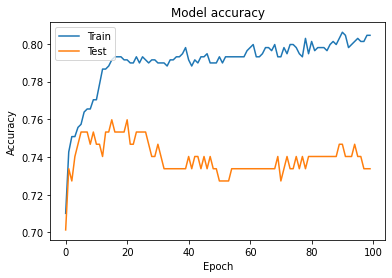

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

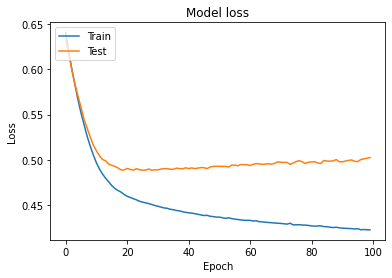

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [0]:
weights, biases = model.layers[0].get_weights()
weights

array([[-0.43112752, -0.14186987,  0.43941018, -0.5946663 ,  0.5884929 ,
        -0.29908088,  0.20941204,  0.30627784, -0.49008343, -0.00156621,
        -0.50927997, -0.47074285, -0.30627653,  0.00312304, -0.13030948,
        -0.13792588],
       [ 0.24858999,  0.38217467,  0.09659846,  0.45690092, -0.19163938,
        -0.58631235,  0.49816525,  0.46030784,  0.06549798, -0.55047154,
        -0.2101541 , -0.11426423,  0.46237496,  0.49634838, -0.14663202,
         0.04436148],
       [-0.02005512, -0.10780461,  0.0492188 ,  0.09147031, -0.16537146,
        -0.24985972,  0.48639125, -0.2080212 , -0.3611108 ,  0.5946049 ,
        -0.03775244,  0.01396507, -0.38611275, -0.2655629 , -0.29525667,
         0.21858732],
       [-0.4191442 ,  0.47532684,  0.19171533,  0.11594326,  0.16951004,
         0.05259495, -0.261073  ,  0.49688065,  0.1625883 , -0.2292512 ,
        -0.621789  , -0.4557514 , -0.54184693,  0.01745369,  0.02874915,
         0.3882287 ],
       [-0.15976547,  0.5436672 ,  0